# BTTH_KTDL_TUAN2_21110414

## Bài 1. Cho một số tự nhiên x và A là 1 mảng N số tự nhiên đôi một khác nhau. Hãy thiết kế một thuật toán có độ phức tạp $O(NlogN)$ theo thời gian để kiểm tra xem có tồn tại $(i, j)$ sao cho $A[i]+A[j]=x$
Input: N, A, x
Output: (i,j).

In [1]:
# import thư viện
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import time


In [2]:
def find_indices(A, x):
    # Khởi tạo danh sách lưu trữ các cặp thỏa ycbt 
    result = []
    # Khởi tạo số phép gán và số phép so sánh
    assign = 1
    comp = 0

    # sort mảng A
    A.sort()
    assign += len(A)*2

    # Thuật toán tìm kiếm nhị phân
    for i in range(len(A)):
        # Khởi tạo biến left cho chạy từ i+1 do i và j đôi một khác nhau
        left = i + 1 
        # Khởi tạo biến right đại diện cho vị trí cuối cùng của mảng A
        right = len(A) - 1

        assign +=2

        while left <= right:
            mid = (left+right)//2
            comp +=1
            assign +=1
            if A[mid] == x - A[i]:
                result.append([i, mid])
                left = mid + 1
                comp +=1
            elif A[mid] < x - A[i]:
                left = mid + 1
                comp += 1
            else:
                right = mid - 1
                comp += 1

            assign += 1
    #Trả về số phép gán và so sánh:
    if result:
        return [result[0][0], result[0][1], assign, comp]
    else:
        return [None, None, assign, comp]



In [3]:
# cho x = 50
x = 50
# N tăng dần theo thứ tự 10,20,30,...1000
list_N = list(range(10,1001,10))
# A được tạo ngẫu nhiên 
def create_list_random(N):
  A = random.sample(range(1, 10001), N)
  return list(A)

for N in list_N:
  A = create_list_random(N)
  target = find_indices(A, x)
  print(f'Mảng A với kích thước N = {N} là', A)
  if target:
    print(f'Tồn tại cặp A(i,j) ({target[0]}, {target[1]}) với số phép gán = {target[2]} và phép so sánh = {target[3]} thỏa ycbt')


Mảng A với kích thước N = 10 là [65, 1533, 2362, 2567, 3537, 3858, 5558, 7423, 8158, 8962]
Tồn tại cặp A(i,j) (None, None) với số phép gán = 79 và phép so sánh = 38 thỏa ycbt
Mảng A với kích thước N = 20 là [1312, 1560, 2568, 3892, 4797, 5111, 5392, 5440, 5626, 5886, 6453, 6749, 7052, 7718, 8240, 8717, 9189, 9280, 9374, 9784]
Tồn tại cặp A(i,j) (None, None) với số phép gán = 189 và phép so sánh = 108 thỏa ycbt
Mảng A với kích thước N = 30 là [241, 1275, 1797, 1861, 2149, 2236, 2329, 2838, 3234, 3349, 3673, 3727, 3877, 4484, 4885, 5388, 6634, 6741, 7147, 7162, 7215, 7385, 7409, 7765, 8834, 9351, 9793, 9856, 9910, 9955]
Tồn tại cặp A(i,j) (None, None) với số phép gán = 309 và phép so sánh = 188 thỏa ycbt
Mảng A với kích thước N = 40 là [43, 529, 531, 543, 801, 879, 1123, 1218, 1659, 1754, 2119, 2131, 3109, 3217, 3512, 3606, 3693, 3736, 4385, 4448, 4815, 4824, 4894, 5106, 5263, 5321, 5337, 5367, 5552, 6290, 6542, 6899, 6945, 6954, 7234, 8327, 9021, 9140, 9852, 9885]
Tồn tại cặp A(i,j) (No


### Thuật toán trên có độ phức tạp là: $ O(Nlog(N))$ do:
### Với thuật toán tìm kiếm nhị phân, ta có độ phức tạp là $O(log_N)$ nên ta có:
$$
\begin{align}
\text{Số phép so sánh:} \, \sum_{i=1}^{N-1} (1+ \sum_{j= \lceil \frac{N-1}{2} \rceil}^{N- \lceil \frac{N-1}{2} \rceil}1) < (N-1)log(N) < 2Nlog({N}) \\
Vậy: \, \exists N = 1 > 0, \, \exists c = 2 > 0: \forall n>N,\, f(x) < 2Nlog(N)
\end{align}
$$  

In [4]:
def calculate_time(list_N,x):

    Time = []
    Assign = []
    Compare = []

    for N in list_N:
        A = create_list_random(N)
        
        start_time = time.time()
        i, mid, assign, comp = find_indices(A,x)
        end_time = time.time()
        
        execution_time = end_time - start_time
        Time.append(execution_time)
        Assign.append(assign)        
        Compare.append(comp)        

        
    return Time, Assign, Compare

Time, Assign, Compare = calculate_time(list_N, x=50)

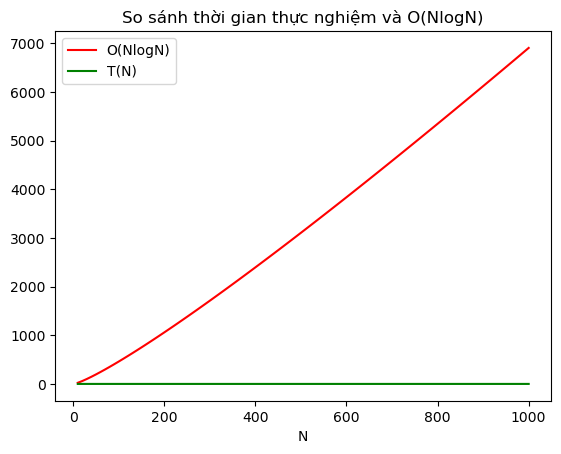

In [5]:
# Visualization
NlogN = [N*math.log(N) for N in list_N]
plt.plot(list_N, NlogN, label='O(NlogN)', color='red')
plt.plot(list_N, Time, label='T(N)', color = 'green')
plt.xlabel('N')
plt.legend()
plt.title('So sánh thời gian thực nghiệm và O(NlogN)')
plt.show()

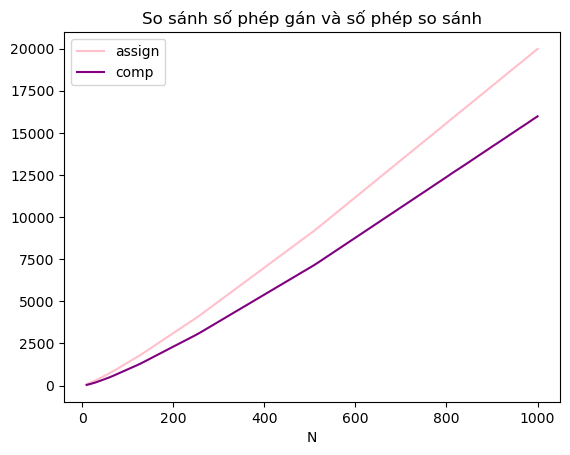

In [6]:
plt.plot(list_N, Assign, label='assign', color='pink')
plt.plot(list_N, Compare, label='comp', color='purple')
plt.xlabel('N')
plt.legend()
plt.title('So sánh số phép gán và số phép so sánh')
plt.show()